### 패키지 import

In [1]:
import os
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 정사진

### 이미지 import

In [2]:
my_image_path = 'image/KakaoTalk_20241118.jpg'
img_bgr = cv2.imread(my_image_path)

### 이미지 색변환 및 확인

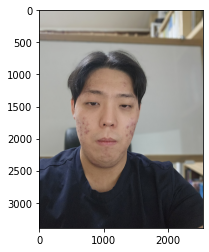

In [3]:
# img_show로 이미지 백업
img_show = img_bgr.copy()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### bounding box 기반 얼굴 추출기

rectangles[[(485, 1125) (1635, 2275)]]


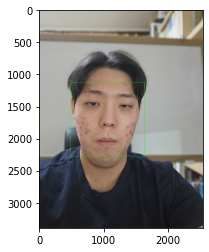

In [4]:
# bounding box에 사용할 이미지 복사
img_rgb_bounding = img_rgb.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(img_rgb_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_rgb_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_rgb_bounding)
plt.show()

### Landmark model import

In [5]:
model_path = 'model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

### Landmark 이미지 생성

68


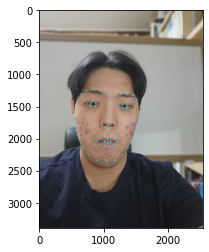

In [6]:
# landmark에 사용할 이미지 복사
img_rgb_land = img_rgb.copy()


list_landmarks = []

# landmark 좌표점을 추출하여 list에 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 저장된 좌표점을 실제 사진에 점으로 append
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(img_rgb_land)
plt.show()

### 스티커 위치 및 크기 추출
아래 이미지를 참조하여 코의 위치 추출

<img src="image/figure_68.jpg" align='left' width="300" height="300"/>

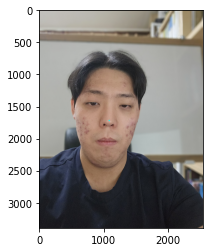

In [7]:
# landmark point 위치 확인
img_rgb_check = img_rgb.copy()

cv2.circle(img_rgb_check, list_landmarks[0][30], 10, (0, 255, 255), -1)
        
plt.imshow(img_rgb_check)
plt.show()

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1088, 1720)
(x,y) : (1088,1720)
(w,h) : (1151,1151)


### 스티커 import

In [9]:
sticker_path = 'image/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(1151, 1151, 3)


In [10]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

refined_x = x - w // 2
refined_y = y - h // 2
print (f'(x,y) : ({refined_x},{refined_y})')

sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0, sticker_area, img_sticker).astype(np.uint8)

(x,y) : (513,1145)


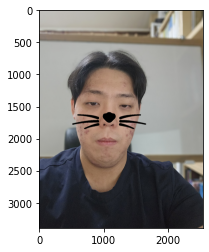

In [11]:
plt.imshow(img_rgb)
plt.show()

## 기울어진 사진

### 이미지 import

In [12]:
my_rimage_path = 'image/KakaoTalk_20241118_1.jpg'
rimg_bgr = cv2.imread(my_rimage_path)

### 이미지 확인

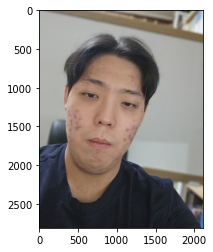

In [13]:
# img_show로 이미지 백업
rimg_show = rimg_bgr.copy()

rimg_rgb = cv2.cvtColor(rimg_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rimg_rgb)
plt.show()

### bounding box 기반 얼굴 추출기

rectangles[[(357, 869) (1508, 2019)]]


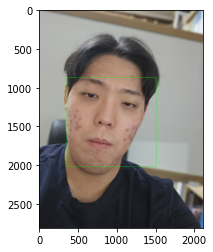

In [14]:
# bounding box에 사용할 이미지 복사
rimg_rgb_bounding = rimg_rgb.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(rimg_rgb_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(rimg_rgb_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(rimg_rgb_bounding)
plt.show()

### landmark 이미지 생성

68


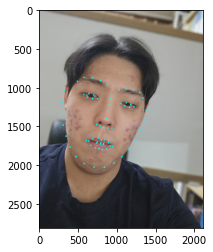

In [15]:
# landmark에 사용할 이미지 복사
rimg_rgb_land = rimg_rgb.copy()


list_landmarks = []

# landmark 좌표점을 추출하여 list에 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(rimg_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 저장된 좌표점을 실제 사진에 점으로 append
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(rimg_rgb_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(rimg_rgb_land)
plt.show()

### 스티커 위치 및 크기 추출

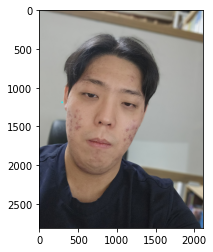

In [16]:
# landmark point 위치 확인
rimg_rgb_check = rimg_rgb.copy()

cv2.circle(rimg_rgb_check, list_landmarks[0][1], 10, (0, 255, 255), -1)
        
plt.imshow(rimg_rgb_check)
plt.show()

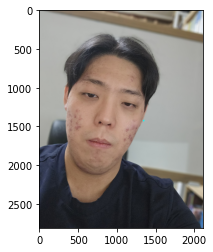

In [17]:
# landmark point 위치 확인
rimg_rgb_check = rimg_rgb.copy()

cv2.circle(rimg_rgb_check, list_landmarks[0][15], 10, (0, 255, 255), -1)
        
plt.imshow(rimg_rgb_check)
plt.show()

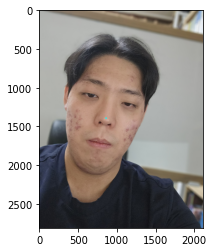

In [18]:
# landmark point 위치 확인
rimg_rgb_check = rimg_rgb.copy()

cv2.circle(rimg_rgb_check, list_landmarks[0][30], 10, (0, 255, 255), -1)
        
plt.imshow(rimg_rgb_check)
plt.show()

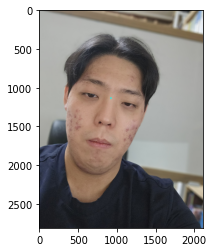

In [19]:
# landmark point 위치 확인
rimg_rgb_check = rimg_rgb.copy()

cv2.circle(rimg_rgb_check, list_landmarks[0][27], 10, (0, 255, 255), -1)
        
plt.imshow(rimg_rgb_check)
plt.show()

- bounding box가 회전한 얼굴에서 얼굴의 면적보다 크게 나옴
- 기존의 bounding box의 넓이 기반으로 스티커의 위치를 추정하는 방식에서는 오류가 클 것으로 예상
- landmark에서 찍힌 점을 기반으로 넓이를 구할 예정 (1번점 및 15번점)

- 얼굴이 회전한 정도는 코를 이루는 점을 이용하여 구할 예정
- 30번 점과 27번 점을 사용할 예정

In [20]:
x = list_landmarks[0][30][0]
y = list_landmarks[0][30][1]

w = h = int(math.sqrt((list_landmarks[0][1][0]-list_landmarks[0][15][0])**2 + (list_landmarks[0][1][1]-list_landmarks[0][15][1])**2))
cx = cy = w // 2

lenght_rimg_x = abs(list_landmarks[0][30][0]-list_landmarks[0][27][0])
lenght_rimg_y = abs(list_landmarks[0][30][1]-list_landmarks[0][27][1])
lenght_rimg = np.sqrt(lenght_rimg_x**2 + lenght_rimg_y**2)
cos_rimg = lenght_rimg_y/lenght_rimg
rotation_rate_rimg = math.degrees(math.acos(cos_rimg))

print (f'(x,y) : ({x},{y})')
print (f'(w,h) : ({w},{h})')
print (rotation_rate_rimg)

(x,y) : (862,1394)
(w,h) : (1074,1074)
13.46226123581555


### 스티커 import

In [21]:
sticker_path = 'image/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(1074, 1074, 3)


### 스티커 rotation

(x,y) : (325,857)
(1074, 1074, 3)


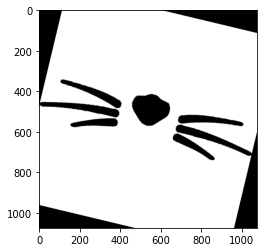

In [22]:
refined_x = x - w // 2
refined_y = y - h // 2
print (f'(x,y) : ({refined_x},{refined_y})')

M = cv2.getRotationMatrix2D((cx, cy), -rotation_rate_rimg, 1.0)
rotated_img_sticker = cv2.warpAffine(img_sticker, M, (w, h))

print(rotated_img_sticker.shape)
plt.imshow(rotated_img_sticker)
plt.show()

In [23]:
rimg_rgb = cv2.cvtColor(rimg_bgr, cv2.COLOR_BGR2RGB)

sticker_area = rimg_rgb[refined_y:refined_y+rotated_img_sticker.shape[0], refined_x:refined_x+rotated_img_sticker.shape[1]]

rimg_rgb[refined_y:refined_y+rotated_img_sticker.shape[0], refined_x:refined_x+rotated_img_sticker.shape[1]] = \
    np.where(rotated_img_sticker!=0, sticker_area, rotated_img_sticker).astype(np.uint8)

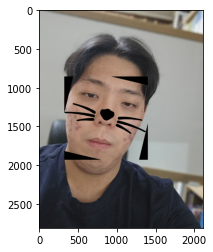

In [24]:
plt.imshow(rimg_rgb)
plt.show()

- 사진을 돌릴때 필요이상의 여백이 생겼음
- 이로인하여 원하지 않는 문양이 사진에 추가됨
https://answers.opencv.org/question/202252/specify-background-color-when-rotating-an-image-using-opencv-in-python/

(1074, 1074, 3)


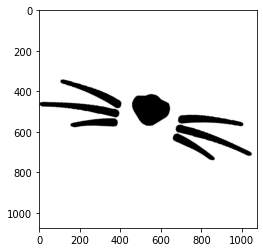

In [25]:
M = cv2.getRotationMatrix2D((cx, cy), -rotation_rate_rimg, 1.0)
rotated_image = cv2.warpAffine(img_sticker, M, (w, h), borderValue=(255,255,255))

print(rotated_image.shape)
plt.imshow(rotated_image)
plt.show()

In [26]:
rimg_rgb = cv2.cvtColor(rimg_bgr, cv2.COLOR_BGR2RGB)

sticker_area = rimg_rgb[refined_y:refined_y+rotated_image.shape[0], refined_x:refined_x+rotated_image.shape[1]]

rimg_rgb[refined_y:refined_y+rotated_image.shape[0], refined_x:refined_x+rotated_image.shape[1]] = \
    np.where(rotated_image!=0, sticker_area, rotated_image).astype(np.uint8)

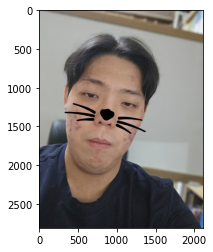

In [27]:
plt.imshow(rimg_rgb)
plt.show()

## 누운 사진

In [28]:
my_limage_path = 'image/KakaoTalk_20241118_2.jpg'
limg_bgr = cv2.imread(my_limage_path)

### 이미지 확인

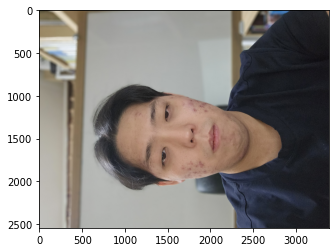

In [29]:
# img_show로 이미지 백업
limg_show = limg_bgr.copy()

limg_rgb = cv2.cvtColor(limg_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(limg_rgb)
plt.show()

### bounding box 기반 얼굴 추출기

rectangles[]


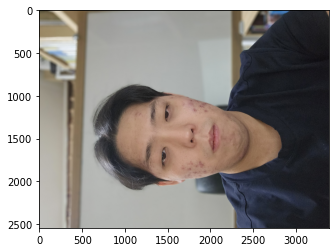

In [30]:
# bounding box에 사용할 이미지 복사
limg_rgb_bounding = limg_rgb.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(limg_rgb_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(limg_rgb_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(limg_rgb_bounding)
plt.show()

### landmark 이미지 생성

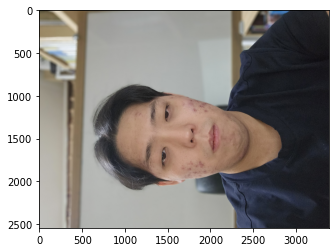

In [32]:
# landmark에 사용할 이미지 복사
limg_rgb_land = limg_rgb.copy()

list_landmarks = []

# landmark 좌표점을 추출하여 list에 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(limg_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 저장된 좌표점을 실제 사진에 점으로 append
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(limg_rgb_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(limg_rgb_land)
plt.show()

- bounding box 및 landmark 추정이 불가능 한것으로 확인됨

## 상하 반전 사진

### 이미지 import

In [33]:
umy_image_path = 'image/KakaoTalk_20241118_3.jpg'
uimg_bgr = cv2.imread(umy_image_path)

### 이미지 확인

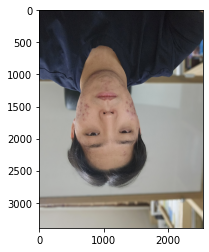

In [34]:
# img_show로 이미지 백업
uimg_show = uimg_bgr.copy()

uimg_rgb = cv2.cvtColor(uimg_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(uimg_rgb)
plt.show()

### bounding box 기반 얼굴 추출기

rectangles[[(123, 1043) (1503, 2423)]]


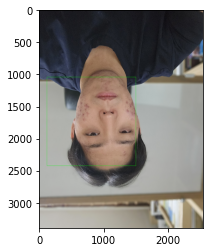

In [35]:
# bounding box에 사용할 이미지 복사
uimg_rgb_bounding = uimg_rgb.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(uimg_rgb_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(uimg_rgb_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(uimg_rgb_bounding)
plt.show()

### landmark 이미지 생성

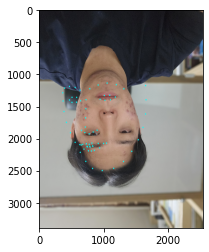

In [36]:
# landmark에 사용할 이미지 복사
uimg_rgb_land = uimg_rgb.copy()

list_landmarks = []

# landmark 좌표점을 추출하여 list에 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(uimg_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 저장된 좌표점을 실제 사진에 점으로 append
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(uimg_rgb_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(uimg_rgb_land)
plt.show()

### landmark point 위치 확인

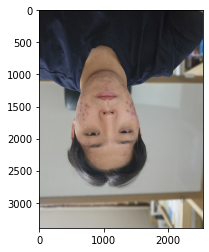

In [37]:
uimg_rgb_check = uimg_rgb.copy()

cv2.circle(uimg_rgb_check, list_landmarks[0][30], 10, (0, 255, 255), -1)
        
plt.imshow(uimg_rgb_check)
plt.show()

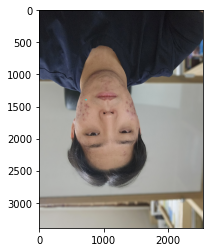

In [38]:
uimg_rgb_check = uimg_rgb.copy()

cv2.circle(uimg_rgb_check, list_landmarks[0][27], 10, (0, 255, 255), -1)
        
plt.imshow(uimg_rgb_check)
plt.show()

- 상하가 뒤집어졌을 때 landmark point의 위치를 정확히 추정하지 못한 것으로 확인함

## 흑백 사진

### 이미지 import

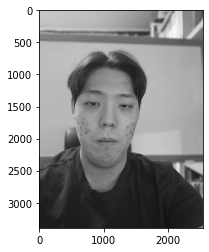

In [39]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

### bounding box 기반 얼굴 추출기

rectangles[[(485, 1125) (1635, 2275)]]


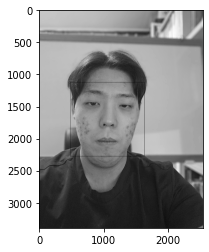

In [40]:
# bounding box에 사용할 이미지 복사
img_gray_bounding = img_gray.copy()

# 기본 얼굴 감지기 선언
detector_hog = dlib.get_frontal_face_detector()

# 감지기를 이용하여 bounding box 추출
dlib_rects = detector_hog(img_gray_bounding, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_gray_bounding, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_gray_bounding, cmap='gray')
plt.show()

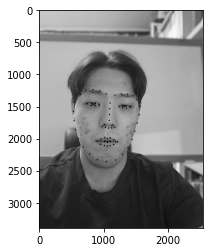

In [41]:
# landmark에 사용할 이미지 복사
img_gray_land = img_gray.copy()

list_landmarks = []

# landmark 좌표점을 추출하여 list에 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_gray, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 저장된 좌표점을 실제 사진에 점으로 append
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_gray_land, point, 10, (0, 255, 255), -1)
        
plt.imshow(img_gray_land, cmap='gray')
plt.show()

In [42]:
x = list_landmarks[0][30][0]
y = list_landmarks[0][30][1]

w = h = int(math.sqrt((list_landmarks[0][1][0]-list_landmarks[0][15][0])**2 + (list_landmarks[0][1][1]-list_landmarks[0][15][1])**2))
cx = cy = w // 2

lenght_rimg_x = abs(list_landmarks[0][30][0]-list_landmarks[0][27][0])
lenght_rimg_y = abs(list_landmarks[0][30][1]-list_landmarks[0][27][1])
lenght_rimg = np.sqrt(lenght_rimg_x**2 + lenght_rimg_y**2)
cos_rimg = lenght_rimg_y/lenght_rimg
rotation_rate_rimg = math.degrees(math.acos(cos_rimg))

print (f'(x,y) : ({x},{y})')
print (f'(w,h) : ({w},{h})')
print (rotation_rate_rimg)

(x,y) : (1089,1720)
(w,h) : (1021,1021)
2.7263109939063455


In [43]:
sticker_path = 'image/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_RGB2GRAY)
img_sticker_gray = cv2.resize(img_sticker_gray, (w,h))
print (img_sticker_gray.shape)

(1021, 1021)


(x,y) : (579,1210)
(1021, 1021)


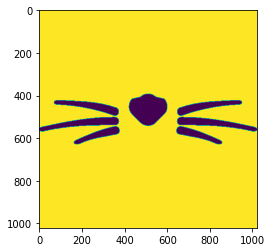

In [44]:
refined_x = x - w // 2
refined_y = y - h // 2
print (f'(x,y) : ({refined_x},{refined_y})')

M = cv2.getRotationMatrix2D((cx, cy), -rotation_rate_rimg, 1.0)
rotated_image_gray = cv2.warpAffine(img_sticker_gray, M, (w, h), borderValue=(255,255,255))

print(img_sticker_gray.shape)
plt.imshow(img_sticker_gray)
plt.show()

In [45]:
sticker_area = img_gray[refined_y:refined_y+img_sticker_gray.shape[0], refined_x:refined_x+img_sticker_gray.shape[1]]

img_gray[refined_y:refined_y+img_sticker_gray.shape[0], refined_x:refined_x+img_sticker_gray.shape[1]] = \
    np.where(img_sticker_gray!=0, sticker_area, img_sticker_gray).astype(np.uint8)

- 본 과정에서 아래와 같은 에러가 나타났음
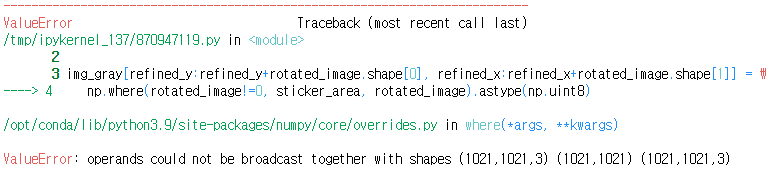
- 원인은 스티커가 1채널이 아니기 때문임
- 스티커를 불러올 때 1 채널로 바꾸었음
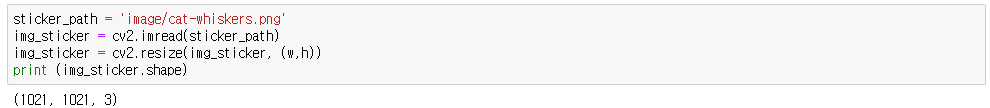
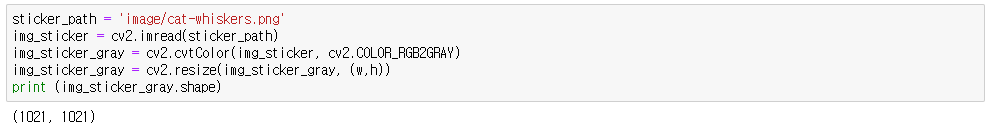

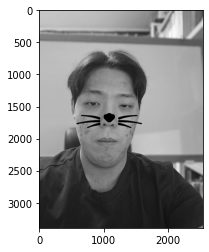

In [46]:
plt.imshow(img_gray, cmap='gray')
plt.show()

- gray image에서도 얼굴 인식 및 스티커 첨부가 잘 되는 것으로 확인

## 회고

1. 90 degree 회전 시 인식을 못하는 문제
    - 다른 사진으로 시도를 해볼 필요가 있었음
    - 뒤집힌 상태에서 어느 각도까지 인식이 가능한지 확인할 필요가 있었음
    - 모델의 한계인지 모델을 소개하는 인사이트를 더 찾아볼 필요가 있었음
2. 상하 대칭 사진에서 인식을 하지 못하는 문제
    - 위 회고와 동일
3. 추가 실험이 필요한 사항
    - 흑백 사진백 사진에서 명도를 조절하여 시험
    (함수를 활용하면, 한번에 다수의 명도에 대한 결과 및 최적(rgb) 점 위치와의 오차를 평가지표로 사용 가능 했을 것)
    - 위에서 적은 회고와 마찬가지로 각도에 따른 인식정도를 시험
    (각도 단위에 따른 최적(straight) 점 위치와 비교가 가능 했을 것)
    - 사진의 확대 및 축소에 따른 인식정도 시험
    (회전 scale %를 계단식으로 설정하여, 해당 단위에 따른 최적(normal) 점 위치와 비교가 가능 했을 것)